# Análise de dados ENEM
***
#### **Participantes:** Erick Araújo Silva, João Paulo do Nascimento Borges e José Messias Marinho Olimpio 
****
##### Atualmente, análise dados vem ganhando muita ênfase no mundo corporativo e se tornando crucial para fazer predições e a cima de tudo ajudar na resolução de problemas e na tomada de decisões.

##### Tendo em vista esse avanço buscou-se, através de uma amostra de dados do ENEM 2019, responder questões e dúvidas sobre a prova.

#### Os dados usados possuem informações sobre o ENEM 2019 como: Municipio dos participantes, UF, idade, sexo, estado civil e etc...

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('Set2')

dados = pd.read_csv("MICRODADOS_ENEM_2019_SAMPLE_43278.csv", na_values=[0])

dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1.0,3.0,...,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1.0,3.0,...,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2.0,1.0,...,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1.0,3.0,...,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1.0,3.0,...,A,A,A,B,A,A,D,A,A,B


## Dentro da amostra quantos candidatos fizeram o enem com idade de 13 anos e de onde eles são e qual sexo?

In [2]:
dados.query("NU_IDADE == 13")[["NO_MUNICIPIO_RESIDENCIA", "SG_UF_RESIDENCIA", "TP_SEXO"]]

,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,TP_SEXO
57359,Atibaia,SP,F
95630,Rondonópolis,MT,M
98197,Macapá,AP,M
116501,Jacobina,BA,M


## Quantos pessoas com idade acima de 60 anos fizeram o enem?

In [3]:
prova_idoso = dados.query("NU_IDADE >= 60")
prova_idoso["NU_IDADE"].count()

301

#### 301 Pessoas da amostra fizeram a prova do enem 2019

<AxesSubplot:title={'center':'Porcentagem participantes >= 60'}>

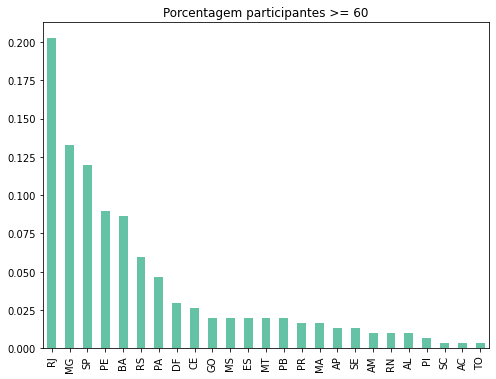

In [4]:
prova_idoso["SG_UF_RESIDENCIA"].value_counts(normalize=True).plot.bar(figsize=(8, 6), title="Porcentagem participantes >= 60")

## Quantos participantes da amostra são da Paraíba?

In [5]:
dados.query("SG_UF_RESIDENCIA == 'PB'")[["SG_UF_RESIDENCIA", "NO_MUNICIPIO_RESIDENCIA"]]

,SG_UF_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA
8429,PB,Pedras de Fogo
8598,PB,Santa Cecília
8699,PB,Pedras de Fogo
9007,PB,Juripiranga
9435,PB,Umbuzeiro
...,...,...
127349,PB,Piancó
127368,PB,João Pessoa
127369,PB,Pombal
127370,PB,São Bento


In [6]:
dados.query("SG_UF_RESIDENCIA == 'PB'")["SG_UF_RESIDENCIA"].count()

3690

#### O valor total de participantes da paraíba que estão na amostra é de 3690

### Atribuí  a soma de todas as colunas referentes as notas de cada aluno a uma coluna do dataset

In [7]:
provas = ["NU_NOTA_LC", "NU_NOTA_CH", "NU_NOTA_CN", "NU_NOTA_MT", "NU_NOTA_REDACAO"]

dados[provas].sum(axis=1)

dados["NU_NOTA_TOTAL"] = dados[provas].sum(axis=1)

### Média

In [8]:
media = dados["NU_NOTA_TOTAL"].mean().round(0)
media

1960.0

### Mediana

In [9]:
mediana = dados["NU_NOTA_TOTAL"].median().round(0)
mediana

2385.0

### Moda

In [10]:
moda = dados["NU_NOTA_TOTAL"].mode()
moda

0    0.0
dtype: float64

### Desvio Padrão

In [11]:
desvio_padrao = dados["NU_NOTA_TOTAL"].std().round(0)
desvio_padrao

1157.0

### Box Plot

<AxesSubplot:>

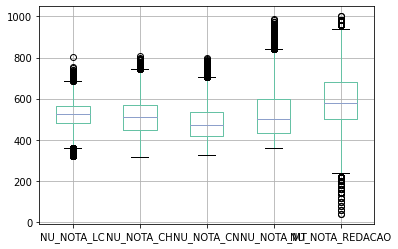

In [12]:
dados[provas].plot.box(grid=True, figsize=(6, 4))

In [13]:
provas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_REDACAO"]

dados[provas].sum()

NU_NOTA_CN         44334986.1
NU_NOTA_CH         49743676.1
NU_NOTA_MT         48563933.8
NU_NOTA_LC         51027844.9
NU_NOTA_REDACAO    56038440.0
dtype: float64

In [52]:
dados[provas].sum(axis=1)

maior_50 = dados["NU_NOTA_TOTAL"] = np.log10(dados[provas].sum(axis=1))
maior_50

0         3.359627
1         3.073572
2         3.371160
3         3.407510
4         3.447701
            ...   
127375    3.457488
127376    3.346059
127377    3.162535
127378    3.410592
127379    3.359418
Length: 127380, dtype: float64

## Mostra a nota total dos participantes que possuem idade maior que  50

#### Verificamos um gráfico de dispersão com os participantes com idade superior a 50 anos
#### Usamos logaritmo de base a fim de padronizar os dados e torna-los mais visiveis

<AxesSubplot:xlabel='NU_NOTA_TOTAL', ylabel='NU_IDADE'>

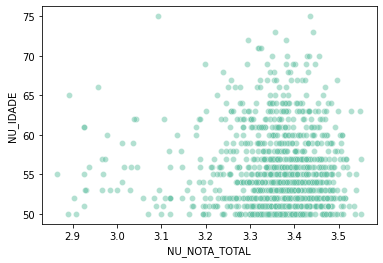

In [42]:
sns.scatterplot(data=maior_50, x="NU_NOTA_TOTAL", y="NU_IDADE", alpha=0.5)

## Mostra a quantidade de participantes em determinado estado civil

#### O gráfico foi plotado para verificar a quantidade de participantes de acordo com o estado civil
#### Legenda:
#### 0 -> Não Informado
#### 1 -> Solteiro
#### 2 -> Casado(a)/Mora com companheiro(a)
#### 3 -> Divorciado(a)/Desquitado(a)/Separado(a)
#### 4 -> Viúvo(a)

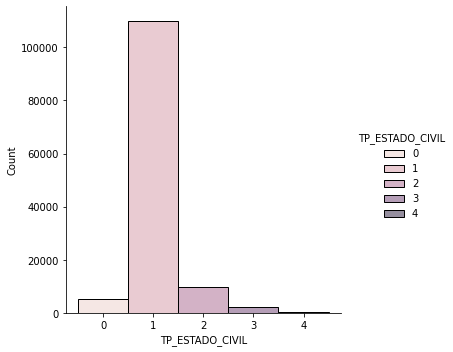

In [38]:
sns.displot(data=dados, x="TP_ESTADO_CIVIL", bins=5, discrete=True, hue="TP_ESTADO_CIVIL")

## Faz um comparativo da idade dos participantes com seu estado civil

#### O gráfico compara o estado civil dos participantes com a idade afim de saber a quantidade de pessoas e a idade com que a maioria fez o enem

<AxesSubplot:xlabel='TP_ESTADO_CIVIL', ylabel='NU_IDADE'>

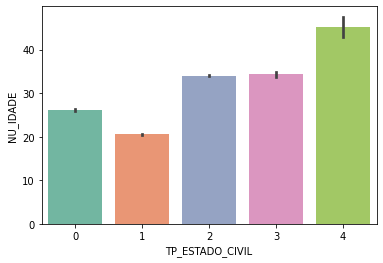

In [52]:
sns.barplot(data=dados, x="TP_ESTADO_CIVIL", y="NU_IDADE", dodge=True)

# Conclusão

#### Tendo em vista a análise de dados realizada nesse projeto sobre o ENEM 2019, podemos ver desde quantidades de pessoas que fizeram a prova em cada estado, até como a idade de cada um deles, por exemplo. Essa análise foi bastante importante para termos conhecimento sobre a demanda que cada estado recebou, e ficou claro que pessoas com idade superior a 50 anos estão saindo bem na prova, provando que cada vez mais estão procurando novos horizontes.

# Referências

#### INSTITUTO NACIONAL DE ESTUDOS E PESQUISAS EDUCACIONAIS ANÍSIO TEIXEIRA.
Microdados
do
Enem
2019.
Brasília:
Inep,
2019.
Disponível
em:
<http://portal.inep.gov.br/web/guest/microdados>. Acesso em: 20 jun. 2020.